In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt 
%matplotlib inline 

import seaborn as sns

In [2]:
# 맥 버전 
data = pd.read_excel('/Users/dongyokim/Library/Mobile Documents/com~apple~CloudDocs/2022:1/비즈니스 애널리틱스/연습문제15.2/연습문제15.2군집분석.xlsx', )

In [ ]:
# 윈도우 버전 
data = pd.read_excel("C:/Users/Innovation/Desktop/김동요/jupyter/Data/BA/연습문제15.2군집분석.xlsx")

In [3]:
data

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE
5,BAY,Bayer AG,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,Hold,GERMANY,NYSE
6,BMY,Bristol-Myers Squibb Company,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6,Moderate Sell,US,NYSE
7,CHTT,"Chattem, Inc",0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,Moderate Buy,US,NASDAQ
8,ELN,"Elan Corporation, plc",0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3,Moderate Sell,IRELAND,NYSE
9,LLY,Eli Lilly and Company,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4,Hold,US,NYSE


In [4]:
data.shape

(21, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Symbol                 21 non-null     object 
 1   Name                   21 non-null     object 
 2   Market_Cap             21 non-null     float64
 3   Beta                   21 non-null     float64
 4   PE_Ratio               21 non-null     float64
 5   ROE                    21 non-null     float64
 6   ROA                    21 non-null     float64
 7   Asset_Turnover         21 non-null     float64
 8   Leverage               21 non-null     float64
 9   Rev_Growth             21 non-null     float64
 10  Net_Profit_Margin      21 non-null     float64
 11  Median_Recommendation  21 non-null     object 
 12  Location               21 non-null     object 
 13  Exchange               21 non-null     object 
dtypes: float64(9), object(5)
memory usage: 2.4+ KB


In [6]:
# 9개의 수치형 변수 제외 모두 제거
quan_data = data.drop(columns=['Symbol', 'Name', 'Median_Recommendation', 'Location', 'Exchange'], axis=1)

In [7]:
quan_data.describe()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,57.651429,0.525714,25.461905,25.795238,10.514286,0.700000,0.585714,13.370952,15.695238
std,58.602960,0.256741,16.310257,15.084975,5.321399,0.216795,0.781310,11.048335,6.562048
min,0.410000,0.180000,3.600000,3.900000,1.400000,0.300000,0.000000,-3.170000,2.600000
25%,6.300000,0.350000,18.900000,14.900000,5.700000,0.600000,0.160000,6.380000,11.200000
50%,48.190000,0.460000,21.500000,22.600000,11.200000,0.600000,0.340000,9.370000,16.100000
75%,73.840000,0.650000,27.900000,31.000000,15.000000,0.900000,0.600000,21.870000,21.100000
max,199.470000,1.110000,82.500000,62.900000,20.300000,1.100000,3.510000,34.210000,25.500000


In [8]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(quan_data)

In [9]:
scaled_data

array([[ 1.88642282e-01, -8.21040576e-01, -4.78668159e-02,
         4.10803822e-02,  2.47578717e-01, -5.24754233e-16,
        -2.17335702e-01, -5.40800775e-01,  6.32054993e-02],
       [-8.75518007e-01, -4.61835324e-01,  3.58342950e+00,
        -8.75950197e-01, -9.65556995e-01,  9.45313187e-01,
         1.87358364e-02, -3.90551348e-01, -1.59203499e+00],
       [-8.97899295e-01, -2.62276851e-01, -2.99167599e-01,
        -7.40093815e-01, -5.22666180e-01,  9.45313187e-01,
        -4.14061984e-01, -5.86246589e-01, -7.01952839e-01],
       [ 1.74479124e-01, -2.28066827e-02, -2.48907443e-01,
         1.09008573e-01,  9.40799124e-01,  9.45313187e-01,
        -7.68169291e-01,  1.51088563e-01,  3.59899549e-01],
       [-1.83446626e-01, -8.21040576e-01, -3.36862717e-01,
        -2.71389297e-01, -5.80434547e-01, -4.72656593e-01,
        -3.22256386e-01,  1.24642544e+00, -4.36489742e-01],
       [-7.12554256e-01,  2.33198330e+00,  1.53173811e-01,
        -1.48730392e+00, -1.75505801e+00, -4.726565

## 1. hierarchical Clustering

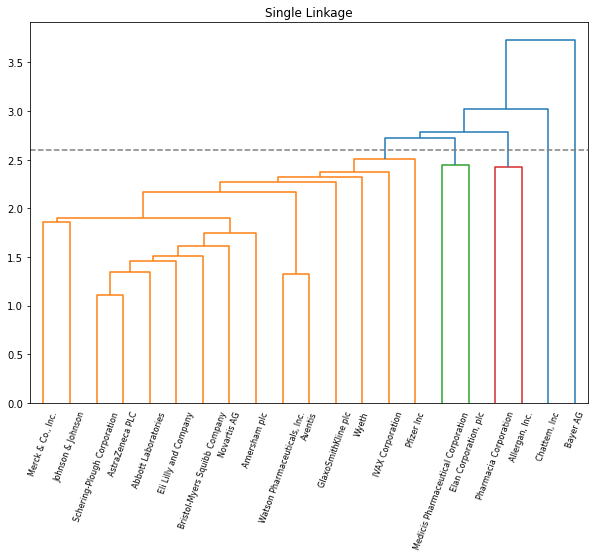

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(scaled_data,'single')
labelList = [i for i in data['Name']]
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Single Linkage')
plt.xticks(size=8, rotation=70)
plt.axhline(2.6, 0.0, 1.0, color= 'gray',linestyle='--')
plt.show()

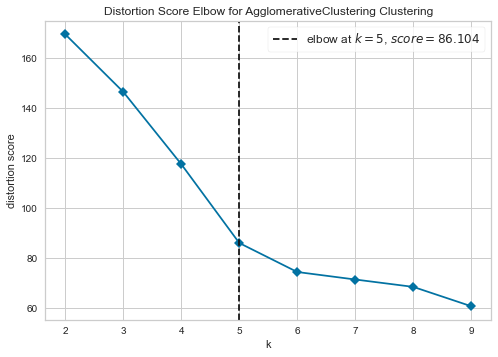

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
# Import ElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering(linkage='single')

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
# Fit data to visualizer
visualizer.fit(scaled_data)
# Finalize and render figure
visualizer.show()

In [12]:
def describe(n_cluster, scaled_data, linkage, data):
    
    agg = AgglomerativeClustering(n_clusters=n_cluster, linkage=linkage)
    
    assign = agg.fit_predict(scaled_data)

    a = assign.reshape(-1, 1)

    x1 = np.hstack([quan_data, a])
    
    for i in range(n_cluster):
        print("cluester {}:".format(i))
        mean =  np.mean(x1[x1[:, -1]== i])
        mx = np.max(x1[x1[:, -1]== i])
        mn = np.min(x1[x1[:, -1]== i])
        stdv = np.std(x1[x1[:, -1]== i])               
        print("{0} linkage".format(linkage))
        print("Mean = {0:.4f}".format(mean))
        print("Max = {0:.4f}".format(mx))
        print("Min = {0:.4f}".format(mn))
        print("Std = {0:.4f}".format(stdv))
        print()             

In [13]:
describe(5, scaled_data, 'single', quan_data)

cluester 0:
single linkage
Mean = 17.1746
Max = 199.4700
Min = -2.6900
Std = 29.0258

cluester 1:
single linkage
Mean = 8.8295
Max = 34.2100
Min = 0.3000
Std = 10.9808

cluester 2:
single linkage
Mean = 7.5650
Max = 26.0000
Min = 0.4100
Std = 9.0418

cluester 3:
single linkage
Mean = 5.4240
Max = 27.9000
Min = -3.1700
Std = 9.0244

cluester 4:
single linkage
Mean = 14.4320
Max = 82.5000
Min = 0.3500
Std = 22.2386



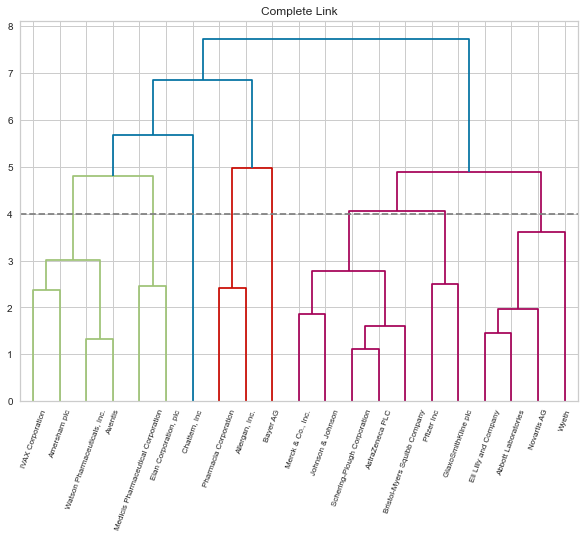

In [14]:
linked = linkage(scaled_data, 'complete')
labelList = [i for i in data['Name']]
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Complete Link')
plt.xticks(size=8, rotation=70)
plt.axhline(4, 0, 1.0, color= 'gray',linestyle='--')
plt.show()

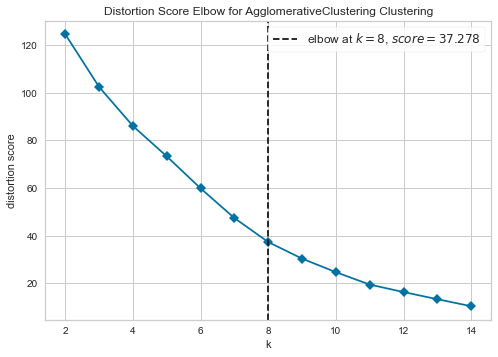

In [15]:
# Import ElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering(linkage='complete')

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15), timings=False)
# Fit data to visualizer
visualizer.fit(scaled_data)
# Finalize and render figure
visualizer.show()
plt.show()

In [16]:
describe(8, scaled_data, 'complete', quan_data)

cluester 0:
complete linkage
Mean = 16.4798
Max = 96.6500
Min = -2.6900
Std = 22.7197

cluester 1:
complete linkage
Mean = 30.5095
Max = 199.4700
Min = 0.1600
Std = 47.9558

cluester 2:
complete linkage
Mean = 9.4345
Max = 47.1600
Min = 0.2000
Std = 10.2884

cluester 3:
complete linkage
Mean = 14.3320
Max = 82.5000
Min = 0.3500
Std = 22.2874

cluester 4:
complete linkage
Mean = 5.5240
Max = 27.9000
Min = -3.1700
Std = 9.0025

cluester 5:
complete linkage
Mean = 19.2886
Max = 173.9300
Min = 0.0000
Std = 31.0623

cluester 6:
complete linkage
Mean = 9.3295
Max = 34.2100
Min = 0.3000
Std = 10.7237

cluester 7:
complete linkage
Mean = 8.0650
Max = 26.0000
Min = 0.4100
Std = 8.8565



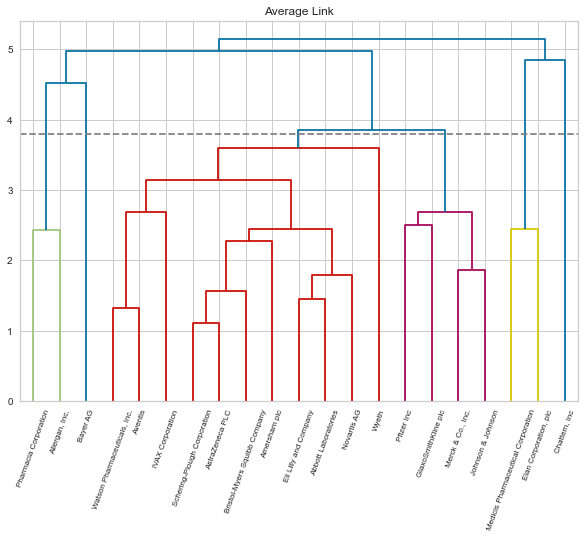

In [17]:
linked = linkage(scaled_data,'average')
labelList = [i for i in data['Name']]
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Average Link')
plt.xticks(size=8, rotation=70)
plt.axhline(3.8, 0.0, 1.0, color= 'gray',linestyle='--')
plt.show()

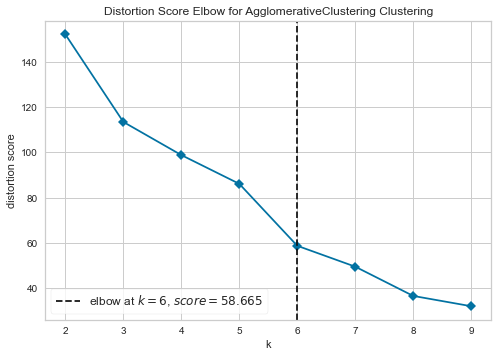

In [18]:
# Import ElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering(linkage='average')

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
# Fit data to visualizer
visualizer.fit(scaled_data)
# Finalize and render figure
visualizer.show()
plt.show()

In [19]:
describe(6, scaled_data, 'average', quan_data)

cluester 0:
average linkage
Mean = 13.1972
Max = 96.6500
Min = -2.6900
Std = 17.5801

cluester 1:
average linkage
Mean = 8.8295
Max = 34.2100
Min = 0.3000
Std = 10.9808

cluester 2:
average linkage
Mean = 28.3125
Max = 199.4700
Min = 0.1000
Std = 46.2107

cluester 3:
average linkage
Mean = 7.6650
Max = 26.0000
Min = 0.4100
Std = 8.9850

cluester 4:
average linkage
Mean = 5.5240
Max = 27.9000
Min = -3.1700
Std = 9.0025

cluester 5:
average linkage
Mean = 14.5320
Max = 82.5000
Min = 0.3500
Std = 22.1936



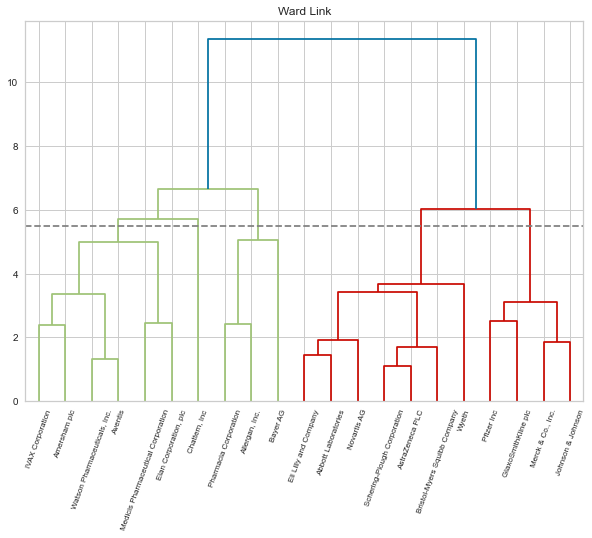

In [20]:
linked = linkage(scaled_data,'ward')
labelList = [i for i in data['Name']]
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Ward Link')
plt.xticks(size=8, rotation=70)
plt.axhline(5.5, 0.0, 1.0, color= 'gray',linestyle='--')
plt.show()

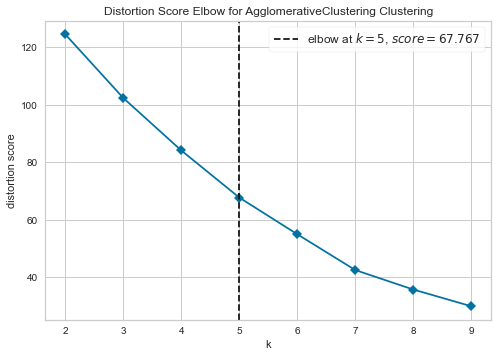

In [21]:
# Import ElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering(linkage='ward')

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
# Fit data to visualizer
visualizer.fit(scaled_data)
# Finalize and render figure
visualizer.show()
plt.show()

In [22]:
describe(5, scaled_data, 'ward', quan_data)

cluester 0:
ward linkage
Mean = 11.0627
Max = 82.5000
Min = -3.1700
Std = 19.5387

cluester 1:
ward linkage
Mean = 15.5616
Max = 96.6500
Min = -2.6900
Std = 20.1537

cluester 2:
ward linkage
Mean = 9.2662
Max = 47.1600
Min = 0.2000
Std = 10.5036

cluester 3:
ward linkage
Mean = 28.4125
Max = 199.4700
Min = 0.1000
Std = 46.1547

cluester 4:
ward linkage
Mean = 7.7650
Max = 26.0000
Min = 0.4100
Std = 8.9380



In [23]:
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')

assign = agg.fit_predict(scaled_data)

data['cluster'] = assign + 1

In [26]:
data.head()

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange,cluster
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE,2
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE,1
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE,3
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE,2
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE,3


In [28]:
# data.to_excel('변수 9개 계층적 군집 분석 피벗 테이블용.xlsx')

In [29]:
quan_data.corr()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
Market_Cap,1.000000,-0.312508,-0.087983,0.619526,0.809089,0.507918,-0.408937,0.003789,0.516711
Beta,-0.312508,1.000000,-0.197163,-0.202733,-0.425836,-0.320697,0.401162,0.088071,-0.345466
PE_Ratio,-0.087983,-0.197163,1.000000,-0.322054,-0.292078,0.149746,-0.039858,-0.154992,-0.462401
ROE,0.619526,-0.202733,-0.322054,1.000000,0.831686,0.496125,0.015606,-0.019054,0.633958
ROA,0.809089,-0.425836,-0.292078,0.831686,1.000000,0.619771,-0.365358,-0.021184,0.748758
Asset_Turnover,0.507918,-0.320697,0.149746,0.496125,0.619771,1.000000,-0.308175,-0.253025,0.018628
Leverage,-0.408937,0.401162,-0.039858,0.015606,-0.365358,-0.308175,1.000000,-0.021881,-0.221352
Rev_Growth,0.003789,0.088071,-0.154992,-0.019054,-0.021184,-0.253025,-0.021881,1.000000,0.084789
Net_Profit_Margin,0.516711,-0.345466,-0.462401,0.633958,0.748758,0.018628,-0.221352,0.084789,1.000000


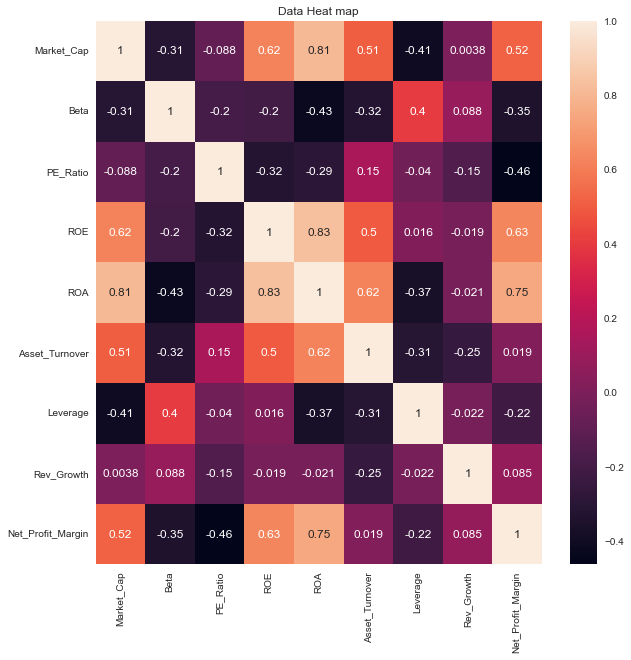

In [30]:
plt.figure(figsize=(10, 10))
plt.title("Data Heat map")
sns.heatmap(quan_data.corr(), annot=True)
plt.show()

In [31]:
# 상관계수가 높은 변수들을 묶어줌 
quan_data = quan_data[["ROA", "ROE", 'Market_Cap', 'Net_Profit_Margin']]
scaled_data = StandardScaler().fit_transform(quan_data)

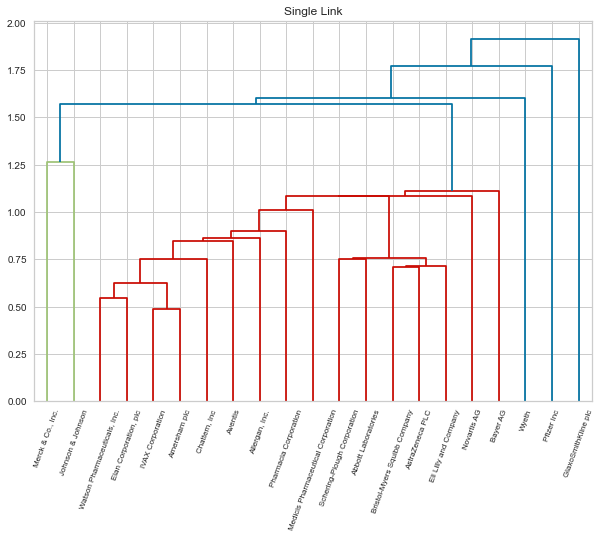

In [32]:
linked = linkage(scaled_data,'single')
labelList = [i for i in data['Name']]
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Single Link')
plt.xticks(size=8, rotation=70)
plt.show()

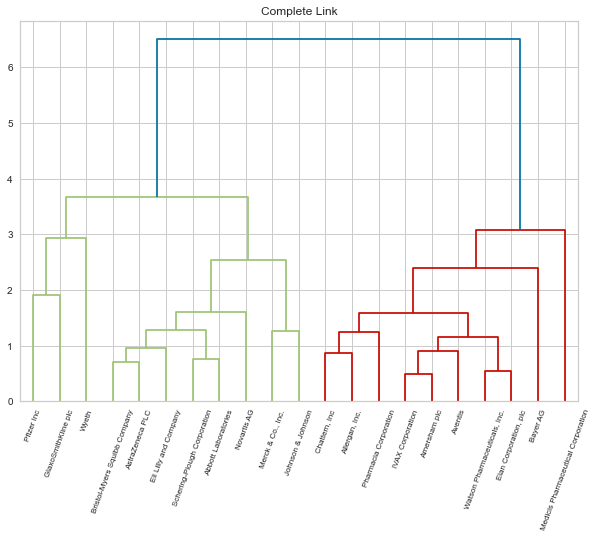

In [33]:
linked = linkage(scaled_data,'complete')
labelList = [i for i in data['Name']]
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Complete Link')
plt.xticks(size=8, rotation=70)
plt.show()

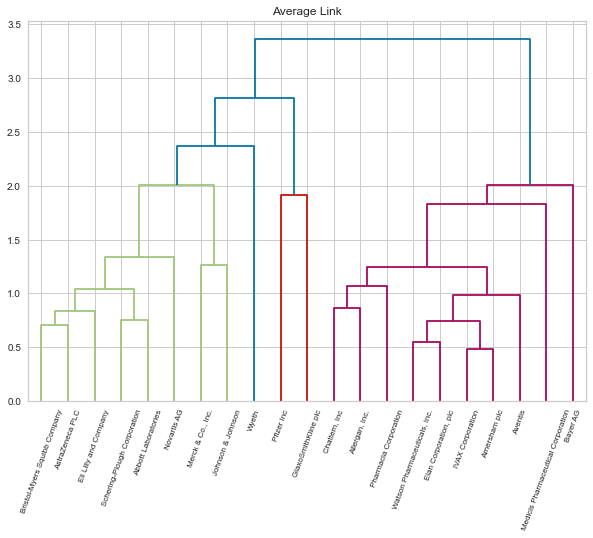

In [34]:
linked = linkage(scaled_data,'average')
labelList = [i for i in data['Name']]
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Average Link')
plt.xticks(size=8, rotation=70)
plt.show()

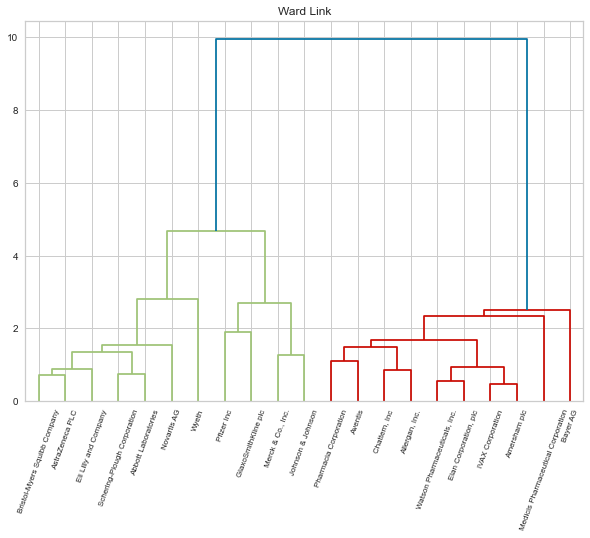

In [35]:
linked = linkage(scaled_data,'ward')
labelList = [i for i in data['Name']]
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Ward Link')
plt.xticks(size=8, rotation=70)
plt.show()

In [36]:
# 상관계수가 높은 변수들을 묶어줌 
quan_data = quan_data[["ROA", "ROE"]]
scaled_data = StandardScaler().fit_transform(quan_data)

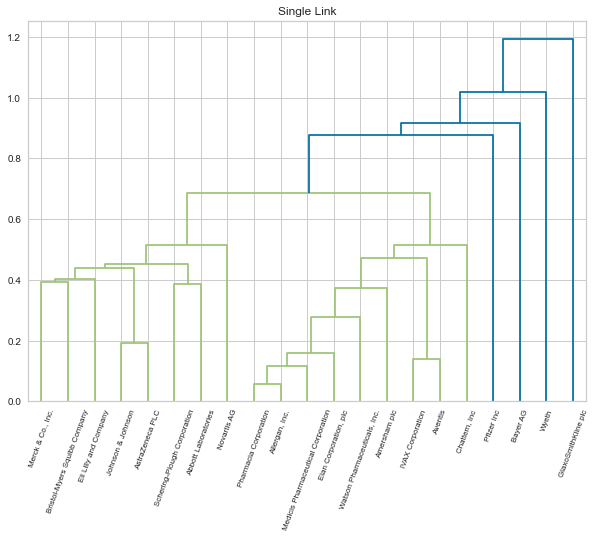

In [37]:
linked = linkage(scaled_data,'single')
labelList = [i for i in data['Name']]
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Single Link')
plt.xticks(size=8, rotation=70)
plt.show()

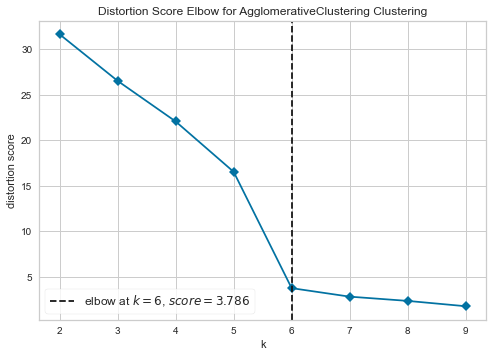

In [38]:
# Import ElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering(linkage='single')

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
# Fit data to visualizer
visualizer.fit(scaled_data)
# Finalize and render figure
visualizer.show()
plt.show()

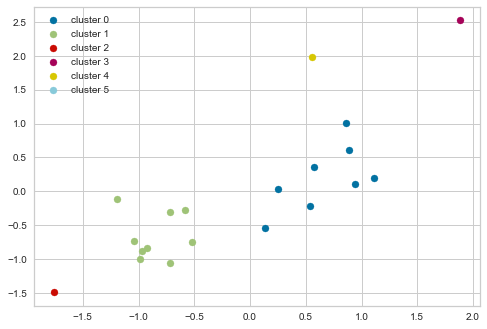

In [39]:
import mglearn

# 모델 생성 및 학습

agg = AgglomerativeClustering(n_clusters=6, linkage='single')

assign = agg.fit_predict(scaled_data)



# 배열 x 오른쪽에 열 한개 추가

a = assign.reshape(-1, 1)

x1 = np.hstack([scaled_data, a])



# 각 클래스별로 데이터 추출

x_0 = x1[x1[:, 2]==0, :]

x_1 = x1[x1[:, 2]==2, :]

x_2 = x1[x1[:, 2]==3, :]

x_3 = x1[x1[:, 2]==4, :]

x_4 = x1[x1[:, 2]==5, :]

x_5 = x1[x1[:, 2]==6, :]

# 시각화

plt.scatter(x_0[:, 0], x_0[:, 1], cmap=mglearn.cm3)

plt.scatter(x_1[:, 0], x_1[:, 1], cmap=mglearn.cm3)

plt.scatter(x_2[:, 0], x_2[:, 1], cmap=mglearn.cm3)

plt.scatter(x_3[:, 0], x_3[:, 1], cmap=mglearn.cm3)

plt.scatter(x_4[:, 0], x_4[:, 1], cmap=mglearn.cm3)

plt.scatter(x_5[:, 0], x_5[:, 1], cmap=mglearn.cm3)

plt.legend(['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3','cluster 4','cluster 5'], loc=2)

plt.show()

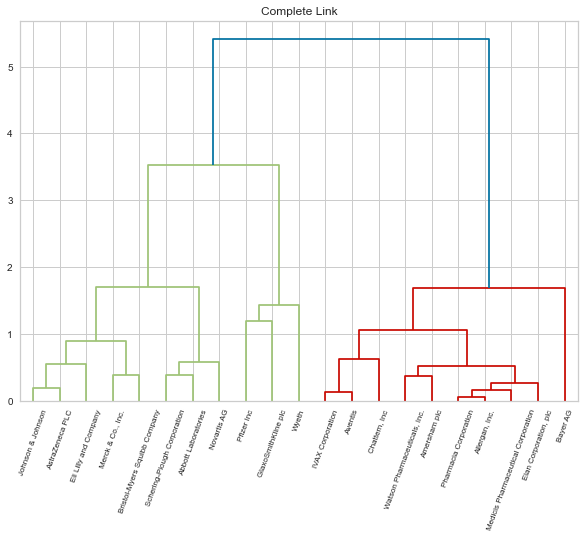

In [40]:
linked = linkage(scaled_data,'complete')
labelList = [i for i in data['Name']]
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Complete Link')
plt.xticks(size=8, rotation=70)
plt.show()

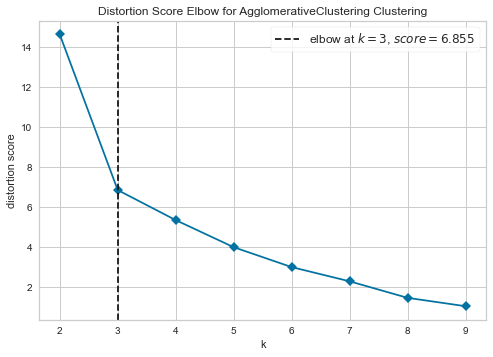

In [41]:
# Import ElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering(linkage='complete')

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
# Fit data to visualizer
visualizer.fit(scaled_data)
# Finalize and render figure
visualizer.show()
plt.show()

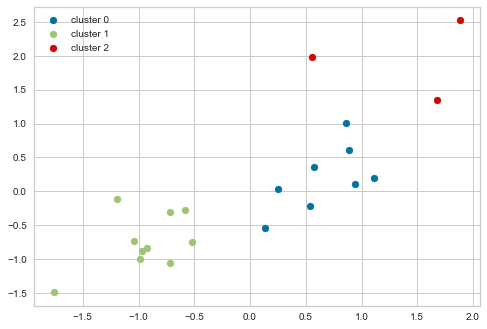

In [42]:
# 모델 생성 및 학습

agg = AgglomerativeClustering(n_clusters=3, linkage='complete')

assign = agg.fit_predict(scaled_data)



# 배열 x 오른쪽에 열 한개 추가

a = assign.reshape(-1, 1)

x1 = np.hstack([scaled_data, a])



# 각 클래스별로 데이터 추출

x_0 = x1[x1[:, 2]==0, :]

x_1 = x1[x1[:, 2]==1, :]

x_2 = x1[x1[:, 2]==2, :]



# 시각화

plt.scatter(x_0[:, 0], x_0[:, 1], cmap=mglearn.cm3)

plt.scatter(x_1[:, 0], x_1[:, 1], cmap=mglearn.cm3)

plt.scatter(x_2[:, 0], x_2[:, 1], cmap=mglearn.cm3)

annotations= [i for i in data['Name']]


plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc=2)

plt.show()

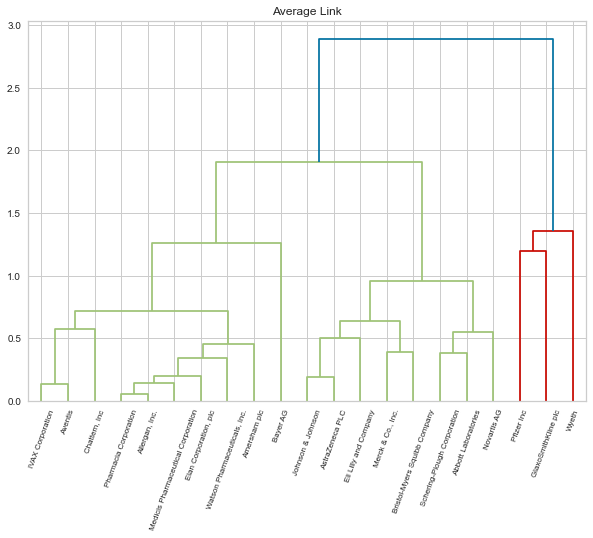

In [43]:
linked = linkage(scaled_data,'average')
labelList = [i for i in data['Name']]
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Average Link')
plt.xticks(size=8, rotation=70)
plt.axhline(3.8, 0.0, 1.0, color= 'gray',linestyle='--')
plt.show()

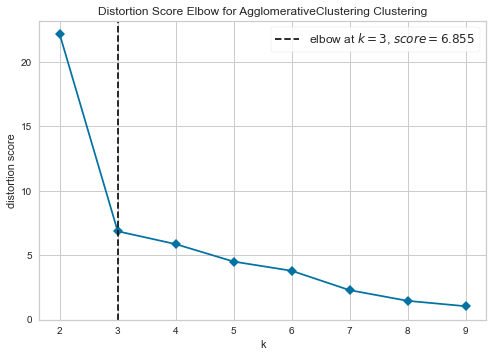

In [44]:
# Import ElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering(linkage='average')

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
# Fit data to visualizer
visualizer.fit(scaled_data)
# Finalize and render figure
visualizer.show()
plt.show()

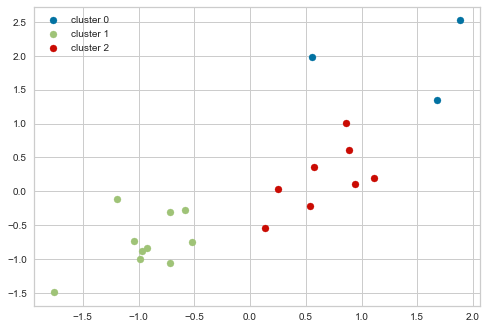

In [45]:
# 모델 생성 및 학습

agg = AgglomerativeClustering(n_clusters=3, linkage='average')

assign = agg.fit_predict(scaled_data)



# 배열 x 오른쪽에 열 한개 추가

a = assign.reshape(-1, 1)

x1 = np.hstack([scaled_data, a])



# 각 클래스별로 데이터 추출

x_0 = x1[x1[:, 2]==0, :]

x_1 = x1[x1[:, 2]==1, :]

x_2 = x1[x1[:, 2]==2, :]



# 시각화

plt.scatter(x_0[:, 0], x_0[:, 1], cmap=mglearn.cm3)

plt.scatter(x_1[:, 0], x_1[:, 1], cmap=mglearn.cm3)

plt.scatter(x_2[:, 0], x_2[:, 1], cmap=mglearn.cm3)

plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc=2)

plt.show()

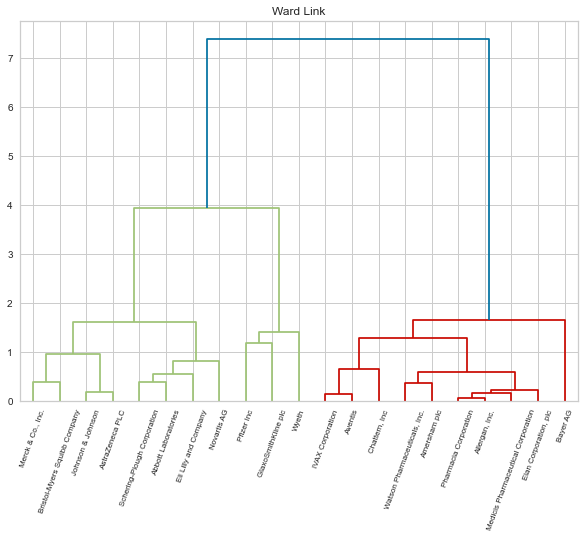

In [46]:
linked = linkage(scaled_data,'ward')
labelList = [i for i in data['Name']]
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Ward Link')
plt.xticks(size=8, rotation=70)
plt.show()

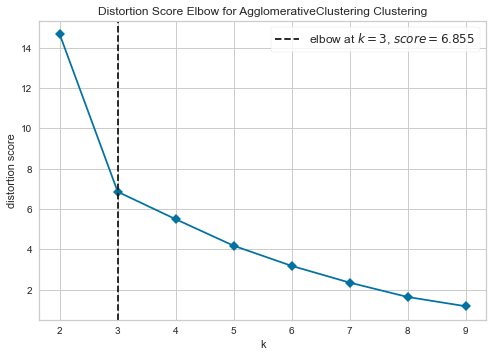

In [47]:
# Import ElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering(linkage='ward')

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
# Fit data to visualizer
visualizer.fit(scaled_data)
# Finalize and render figure
visualizer.show()
plt.show()

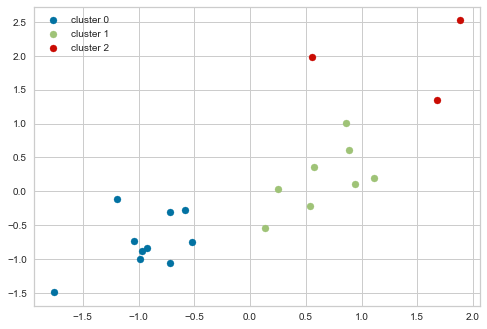

In [48]:
# 모델 생성 및 학습

agg = AgglomerativeClustering(n_clusters=3, linkage='ward')

assign = agg.fit_predict(scaled_data)



# 배열 x 오른쪽에 열 한개 추가

a = assign.reshape(-1, 1)

x1 = np.hstack([scaled_data, a])



# 각 클래스별로 데이터 추출

x_0 = x1[x1[:, 2]==0, :]

x_1 = x1[x1[:, 2]==1, :]

x_2 = x1[x1[:, 2]==2, :]



# 시각화

plt.scatter(x_0[:, 0], x_0[:, 1], cmap=mglearn.cm3)

plt.scatter(x_1[:, 0], x_1[:, 1], cmap=mglearn.cm3)

plt.scatter(x_2[:, 0], x_2[:, 1], cmap=mglearn.cm3)

plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc=2)

plt.show()

In [49]:
describe(3, scaled_data, 'ward', quan_data)

cluester 0:
ward linkage
Mean = 6.8433
Max = 24.1000
Min = 0.0000
Std = 7.0719

cluester 1:
ward linkage
Mean = 14.5375
Max = 40.6000
Min = 1.0000
Std = 11.9596

cluester 2:
ward linkage
Mean = 24.7000
Max = 62.9000
Min = 2.0000
Std = 22.4382



In [50]:
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')

assign = agg.fit_predict(scaled_data)

data['cluster'] = assign + 1

In [53]:
data.head()

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange,cluster
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE,2
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE,1
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE,1
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE,2
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE,1


In [54]:
# data.to_excel('변수 2개로 계층 군집 분석 피벗테이블용.xlsx')

## 2. K-means

In [3]:
# 윈도우 버전 
data = pd.read_excel("C:/Users/Innovation/Desktop/김동요/jupyter/Data/BA/연습문제15.2군집분석.xlsx")

In [57]:
# 맥 버전 
data = pd.read_excel('/Users/dongyokim/Library/Mobile Documents/com~apple~CloudDocs/2022:1/비즈니스 애널리틱스/연습문제15.2/연습문제15.2군집분석.xlsx', )

In [5]:
# 9개의 수치형 변수 제외 모두 제거
from sklearn.preprocessing import StandardScaler

quan_data = data.drop(columns=['Symbol', 'Name', 'Median_Recommendation', 'Location', 'Exchange'], axis=1)
scaled_data = StandardScaler().fit_transform(quan_data)

In [6]:
scaled_data.shape

(21, 9)

In [7]:
from sklearn.metrics import silhouette_samples, silhouette_score

n_clusters=4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=10, random_state=0)

cluster_labels = kmeans.fit_predict(scaled_data)
cluster_labels

array([0, 1, 1, 2, 3, 1, 0, 3, 3, 0, 2, 3, 2, 3, 2, 0, 2, 1, 0, 3, 0])

In [9]:
data['cluster'] = cluster_labels + 1

In [11]:
# data.to_excel('9개 분석 K-means 피벗 테이블용.xlsx')

In [ ]:
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print("For n_clusters =",n_clusters)
print("The average silhouette_score is :", silhouette_avg)

In [ ]:
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

In [ ]:
def visualize_sil(List, X):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np



    for n_clusters in List:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters + \
                          '\nSilhouette Score :' + str(round(silhouette_avg,3)) ,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()



In [ ]:
visualize_sil([2, 3, 4, 5, 6, 7], scaled_data)